## Fase 1: Exploración y limpieza de datos

### 1.Cargar las librerías necesarias y datasets

In [27]:
import pandas as pd #para manejar dataframes
import numpy as np #para operaciones numéricas
import matplotlib.pyplot as plt #para visualización
import seaborn as sns #para visualización avanzada

# Cargar datasets
flight_path = "data/Customer Flight Activity.csv"
loyalty_path = "data/Customer Loyalty History.csv"

df_flights = pd.read_csv(flight_path)
df_loyalty = pd.read_csv(loyalty_path)
print("Datasets cargados exitosamente.")

Datasets cargados exitosamente.


## 2. Exploración inicial de los datos: estructura y tipos

In [28]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [29]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [30]:
df_flights.describe().round(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.00,405624.0,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00
mean,550037.87,2017.5,6.50,4.12,1.03,5.15,1208.88,123.69,30.70,2.48
std,258935.29,0.5,3.45,5.23,2.08,6.52,1433.16,146.60,125.49,10.15
min,100018.00,2017.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,326961.00,2017.0,3.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,550834.00,2017.5,6.50,1.00,0.00,1.00,488.00,50.00,0.00,0.00
75%,772194.00,2018.0,9.25,8.00,1.00,10.00,2336.00,239.00,0.00,0.00
max,999986.00,2018.0,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00


In [31]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [32]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [33]:
df_loyalty.describe().round(2)

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.00,12499.00,16737.00,16737.00,16737.00,2067.00,2067.00
mean,549735.88,79245.61,7988.90,2015.25,6.67,2016.50,6.96
std,258912.13,35008.30,6860.98,1.98,3.40,1.38,3.46
min,100018.00,-58486.00,1898.01,2012.00,1.00,2013.00,1.00
25%,326603.00,59246.50,3980.84,2014.00,4.00,2016.00,4.00
50%,550434.00,73455.00,5780.18,2015.00,7.00,2017.00,7.00
75%,772019.00,88517.50,8940.58,2017.00,10.00,2018.00,10.00
max,999986.00,407228.00,83325.38,2018.00,12.00,2018.00,12.00


## 3. Búsqueda de nulos y valores atípicos

In [34]:
df_flights.isna().sum()
df_loyalty.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [35]:
df_flights.isna().mean() * 100
df_loyalty.isna().mean() * 100
#Con porcentajes

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

## 4. Chequear duplicados

In [37]:
df_flights.duplicated().sum()
df_loyalty.duplicated().sum()


np.int64(0)

## 5. Unir los datasets

In [38]:
df = pd.merge(
    df_flights,
    df_loyalty,
    on="Loyalty Number",
    how="left"
)
print("Datasets unidos exitosamente.")
df.head()

Datasets unidos exitosamente.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [ ]:
# un left para mantener todas las observaciones de actividad de vuelo y añadirle la información de perfil del cliente

In [39]:
#comprobar los nulos una vez unidos, siguen siendo los mismos
df.info()
df.isna().sum()
df.isna().mean() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

## 6. Ajuste de datos 

### 1. Eliminación o imputación de nulos

In [40]:
#Hay un 25% de nulos en la columna Salary
df_loyalty.groupby("Education")["Salary"].describe().round(2)
# salario muy relacionado con nivel educativo

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72451.06,17207.35,-58486.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.90,70466.19,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61071.72,12733.50,-49830.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.85,17527.94,56414.0,88120.00,105487.0,118530.0,133080.0


In [41]:
# Trabajamos en el dataframe ya unido 'df'
df["Salary"] = df["Salary"].astype("float")

# Calcular medias por nivel educativo
salary_means = df.groupby("Education")["Salary"].transform("mean")

# Rellenar solo los nulos con la media de su grupo de Education
df["Salary"] = df["Salary"].fillna(salary_means)

In [42]:
# Recalcula la media por Education
edu_means = df.groupby("Education")["Salary"].mean().round(2)
print(edu_means)

# Comprueba en algunas filas concretas
df[df["Education"] == "Bachelor"][["Education", "Salary"]].head(10)


Education
Bachelor                 72476.21
College                       NaN
Doctor                  178335.44
High School or Below     60986.54
Master                  103767.49
Name: Salary, dtype: float64


,Education,Salary
0,Bachelor,92552.0
3,Bachelor,63253.0
4,Bachelor,91163.0
5,Bachelor,70323.0
6,Bachelor,76849.0
7,Bachelor,69695.0
8,Bachelor,63478.0
9,Bachelor,75638.0
10,Bachelor,54133.0
11,Bachelor,89340.0


In [43]:
df["Salary"].isna().sum()
df["Salary"].describe()
df.groupby("Education")["Salary"].mean()

Education
Bachelor                 72476.211860
College                           NaN
Doctor                  178335.439516
High School or Below     60986.544192
Master                  103767.494163
Name: Salary, dtype: float64

In [44]:
# Media global de Salary
global_mean = df["Salary"].mean()

# Rellenar solo los que siguen a NaN
df.loc[df["Salary"].isna(), "Salary"] = global_mean

In [45]:
df["Salary"].isna().sum()
df.groupby("Education")["Salary"].mean()

Education
Bachelor                 72476.211860
College                  79268.825953
Doctor                  178335.439516
High School or Below     60986.544192
Master                  103767.494163
Name: Salary, dtype: float64

In [46]:
df.info() #compruebo que ya no estan los nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [ ]:
#no borro los nulos que no son relevantes o que son lógicos en mi dataset

In [47]:
# A. Convertir columnas temporales a enteros
df["Year"] = df["Year"].astype("int64")
df["Month"] = df["Month"].astype("int64")

In [48]:
# B. Crear columna de fecha completa
df["Date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01"
)

In [49]:
# C. Columnas categóricas a tipo 'category' 
cat_cols = ["gender", "education", "marital status", "loyalty card", 
            "country", "province", "city"]
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

In [50]:
# D. CORREGIR SALARIOS NEGATIVOS
df["Salary"] = df["Salary"].abs()  # Valor absoluto, en lugar de eliminar filas

In [51]:
# Estandarizar nombres de columnas (minúsculas)
df_flights.columns = df_flights.columns.str.lower()
df_loyalty.columns = df_loyalty.columns.str.lower()

# Verificar
print("Columnas flights:", df_flights.columns.tolist())
print("Columnas loyalty:", df_loyalty.columns.tolist())


Columnas flights: ['loyalty number', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed']
Columnas loyalty: ['loyalty number', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month']


In [52]:
df.columns = df.columns.str.lower()
# Verificar
print("Columnas df:", df.columns.tolist())

Columnas df: ['loyalty number', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month', 'date']


In [53]:
# Verificar que todo está bien
print("Tipos de datos finales:")
print(df.dtypes)
print("\nSalary después de corrección:")
print(df["salary"].describe())
print("\nNulos restantes en Salary:", df["salary"].isna().sum())

Tipos de datos finales:
loyalty number                          int64
year                                    int64
month                                   int64
flights booked                          int64
flights with companions                 int64
total flights                           int64
distance                                int64
points accumulated                    float64
points redeemed                         int64
dollar cost points redeemed             int64
country                                object
province                               object
city                                   object
postal code                            object
gender                                 object
education                              object
salary                                float64
marital status                         object
loyalty card                           object
clv                                   float64
enrollment type                        object
enrollment

In [ ]:
# Guardar datasets procesados (columnas en minúsculas)
df_flights.to_csv('customer_flight_activity_clean.csv', index=False)
df_loyalty.to_csv('customer_loyalty_history_clean.csv', index=False)
df.to_csv('df_merged_clean.csv', index=False)

print("✅ Guardados:")
print("- customer_flight_activity_clean.csv")
print("- customer_loyalty_history_clean.csv") 
print("- df_merged_clean.csv")


✅ Guardados:
- customer_flight_activity_clean.csv
- customer_loyalty_history_clean.csv
- df_merged_clean.csv


In [54]:
# En lugar de los originales, cargar los limpios
df_flights = pd.read_csv('customer_flight_activity_clean.csv')
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')
df = pd.read_csv('df_merged_clean.csv')


# Fase 2: Análisis estadístico 

In [55]:
# Verificar datasets limpios
print("=== SHAPE ===")
print("Flight:", df_flights.shape)
print("Loyalty:", df_loyalty.shape)
print("Merged:", df.shape)

print("\n=== TIPOS DE DATOS (merged) ===")
print(df.dtypes)
print("\n=== MEMORY USAGE ===")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")


=== SHAPE ===
Flight: (405624, 10)
Loyalty: (16737, 16)
Merged: (405624, 26)

=== TIPOS DE DATOS (merged) ===
loyalty number                   int64
year                             int64
month                            int64
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                         int64
points accumulated             float64
points redeemed                  int64
dollar cost points redeemed      int64
country                         object
province                        object
city                            object
postal code                     object
gender                          object
education                       object
salary                         float64
marital status                  object
loyalty card                    object
clv                            float64
enrollment type                 object
enrollment year                  int64
enrollment month                

In [56]:
# Missing values por columna
print("=== MISSING VALUES (%) ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
print(pd.DataFrame({'Missing': missing, '%': missing_pct}).round(2))


=== MISSING VALUES (%) ===
                             Missing      %
loyalty number                     0   0.00
year                               0   0.00
month                              0   0.00
flights booked                     0   0.00
flights with companions            0   0.00
total flights                      0   0.00
distance                           0   0.00
points accumulated                 0   0.00
points redeemed                    0   0.00
dollar cost points redeemed        0   0.00
country                            0   0.00
province                           0   0.00
city                               0   0.00
postal code                        0   0.00
gender                             0   0.00
education                          0   0.00
salary                             0   0.00
marital status                     0   0.00
loyalty card                       0   0.00
clv                                0   0.00
enrollment type                    0   0.00
enrol

## 1. Análisis de variables numéricas

### Estadísticas descriptivas básicas

In [59]:
# Variables numéricas relevantes (negocio)
vars_numericas = ['total flights', 'distance', 'points accumulated', 'points redeemed', 
                  'dollar cost points redeemed', 'salary', 'clv']

print(" ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
stats = df[vars_numericas].describe(include='all').round(2)
print(stats)

# Moda (valor más frecuente)
print(" MODA:")
for col in vars_numericas:
    moda = df[col].mode()
    print(f"{col}: {moda.iloc[0] if len(moda)>0 else 'No aplica'}")

 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
       total flights   distance  points accumulated  points redeemed  \
count      405624.00  405624.00           405624.00        405624.00   
mean            5.15    1208.88              123.69            30.70   
std             6.52    1433.16              146.60           125.49   
min             0.00       0.00                0.00             0.00   
25%             0.00       0.00                0.00             0.00   
50%             1.00     488.00               50.00             0.00   
75%            10.00    2336.00              239.00             0.00   
max            32.00    6293.00              676.50           876.00   

       dollar cost points redeemed     salary        clv  
count                    405624.00  405624.00  405624.00  
mean                          2.48   79352.94    7991.98  
std                          10.15   30019.54    6863.66  
min                           0.00    9081.00    1898.01  
25%    

In [ ]:
# la mayoría de los clientes, aproximadamente un 49%, no registraron vuelos en un mes específico
#Esto refleja clientes infrecuentes, en este análisis se considera usar otra métrica como mediana 

### Identificación de valores atípicos, outliers

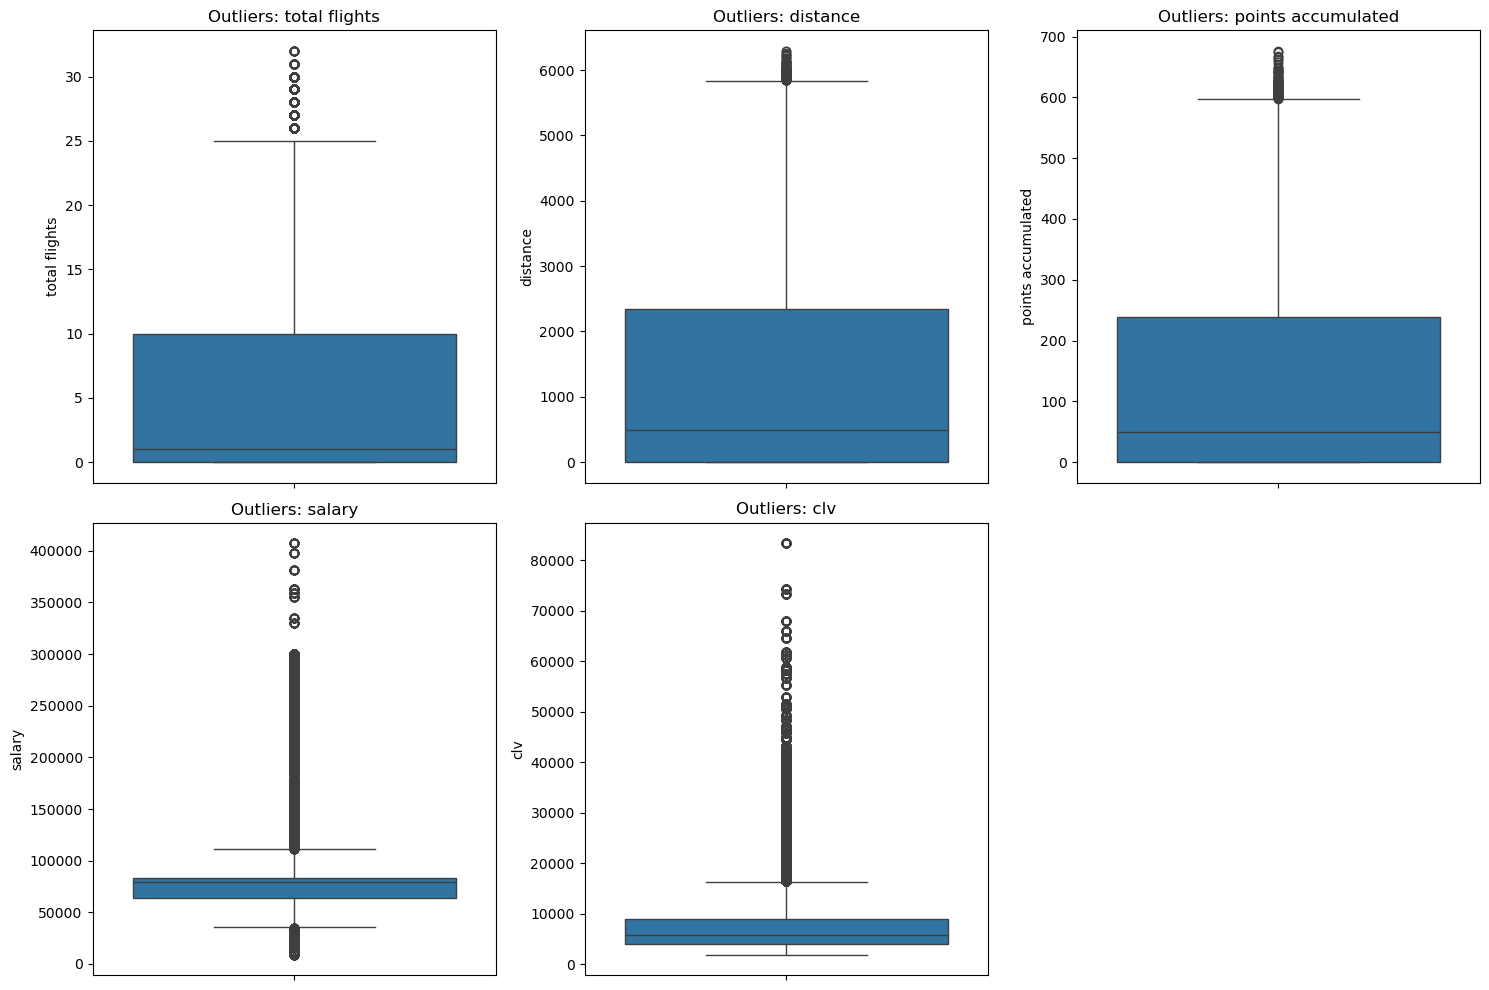

In [60]:
# Boxplot outliers
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 10))
vars_outliers = ['total flights', 'distance', 'points accumulated', 'salary', 'clv']
for i, var in enumerate(vars_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Outliers: {var}')
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv('customer_flight_activity_clean.csv', low_memory=False)

# Seleccionar la columna
columna = 'total flights'
datos = df[columna].dropna()

# Calcular estadísticos IQR
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df[columna] < limite_inf) | (df[columna] > limite_sup)]
outliers_altos = df[df[columna] > limite_sup]
outliers_bajos = df[df[columna] < limite_inf]

# Resultados
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Límite inferior: {limite_inf}')
print(f'Límite superior: {limite_sup}')
print(f'Outliers totales: {len(outliers)}')
print(f'Outliers altos: {len(outliers_altos)}')
print(f'Outliers bajos: {len(outliers_bajos)}')
print(f'Porcentaje outliers: {len(outliers)/len(df)*100:.2f}%')

# Mostrar distribución de outliers altos
print('\nOutliers altos por valor:')
print(outliers_altos[columna].value_counts().sort_index())

# Guardar outliers a CSV (opcional)
outliers.to_csv('outliers_Total_Flights.csv', index=False)
print('\nOutliers guardados en "outliers_Total_Flights.csv"')


Q1: 0.0
Q3: 10.0
IQR: 10.0
Límite inferior: -15.0
Límite superior: 25.0
Outliers totales: 1984
Outliers altos: 1984
Outliers bajos: 0
Porcentaje outliers: 0.49%

Outliers altos por valor:
total flights
26    722
27    504
28    306
29    214
30    150
31     61
32     27
Name: count, dtype: int64

Outliers guardados en "outliers_Total_Flights.csv"


### Análisis de correlación entre variables numéricas

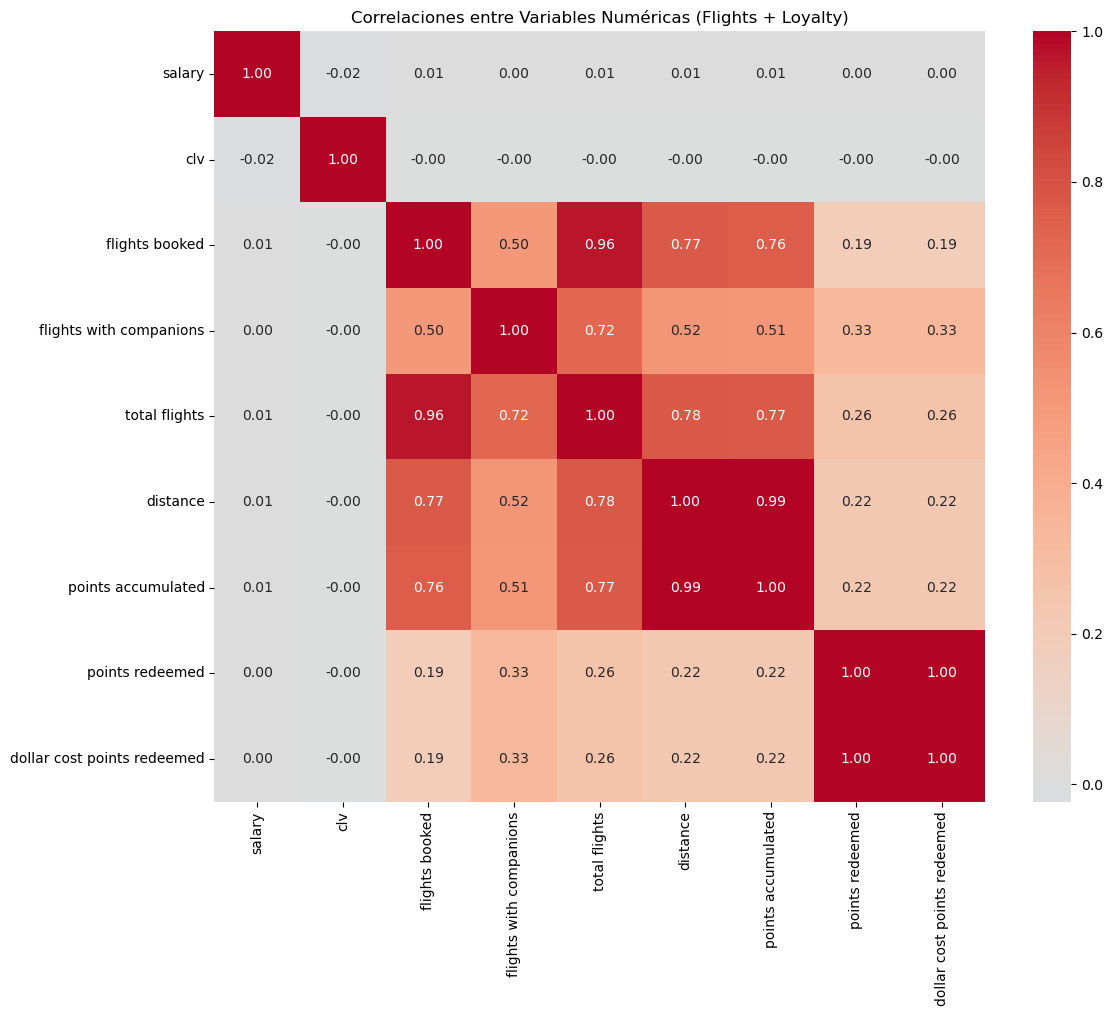

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar ambos datasets
df_flights = pd.read_csv('customer_flight_activity_clean.csv', low_memory=False)
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')

# Merge por Loyalty Number (solo clientes únicos de loyalty)
df_merged = pd.merge(df_loyalty[['loyalty number', 'salary', 'clv']], 
                     df_flights, on='loyalty number', how='inner')

# Variables numéricas combinadas
vars_numericas = ['salary', 'clv', 'flights booked', 'flights with companions', 
                  'total flights', 'distance', 'points accumulated', 
                  'points redeemed', 'dollar cost points redeemed']

# Matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = df_merged[vars_numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlaciones entre Variables Numéricas (Flights + Loyalty)')
plt.tight_layout()
plt.show()


- Correlaciones fuertes (>0.7 o <-0.7):

    - Total Flights y Flights Booked (0,96): Los clientes que vuelan más tienden a reservar más vuelos.
    - Total Flights y distancia(0.78): Los clientes que vuelan más tienden a cubrir mayores distancias.
    - Points Accumulated y Total Flights (0.77): Los clientes que vuelan más acumulan más puntos.
    - Points Accumulated y Distance (0.99): Los clientes que cubren mayores distancias acumulan más puntos.

- Correlaciones medias (0.5-0.7 o -0.5 a -0.7):

    - Flights booked y fligths with companions (0,50): Los clientes que reservan más vuelos tienden a viajar con acompañantes.
    - Flights with companions y distance (0.52): Los clientes que viajan con acompañantes tienden a cubrir mayores distancias.
    - Flithts with companions y points accumulated (0.51): Los clientes que viajan con acompañantes tienden a acumular más puntos.

- Correlaciones débiles (<0.5 o >-0.5):

    - Flights with companions y points redeemed (0.33): Existe una correlación positiva débil entre viajar con acompañantes y los puntos canjeados.
    - Total flights y Points Redeemed (0.26): Existe una correlación positiva débil entre el número total de vuelos y los puntos canjeados.
    - Distance y Points Redeemed (0.22): Existe una correlación positiva débil entre la distancia y los puntos canjeados. 
    - Points Accumulated y Points Redeemed (0.22): Existe una correlación positiva débil entre los puntos acumulados y los puntos canjeados.
    - Flights Booked y Points Redeemed (0.19): Existe una correlación positiva débil entre los vuelos reservados y los puntos canjeados.

LOYALTY CATEGÓRICAS:

PROVINCE:
province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
Top: 5404 (32.3%)


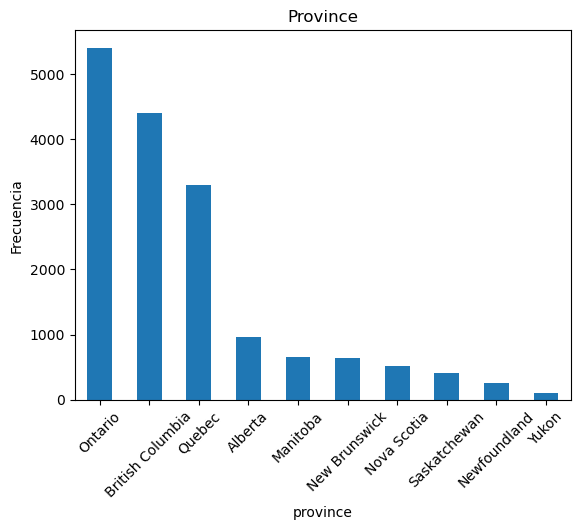


EDUCATION:
education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64
Top: 10475 (62.6%)


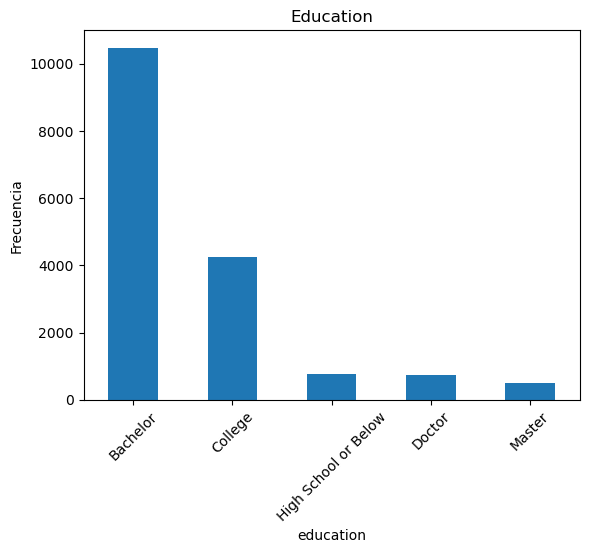


MARITAL STATUS:
marital status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64
Top: 9735 (58.2%)


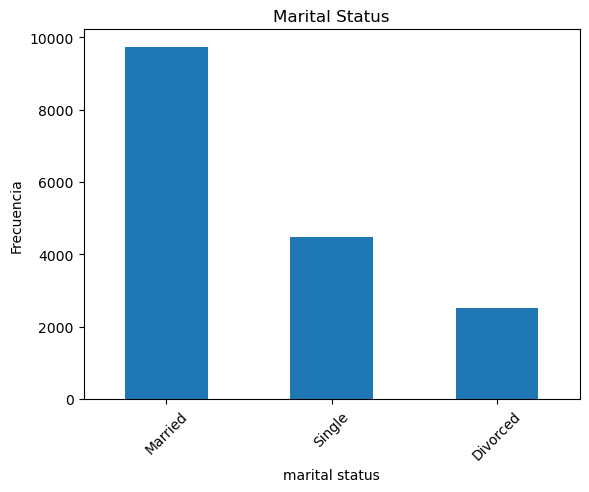


LOYALTY CARD:
loyalty card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64
Top: 7637 (45.6%)


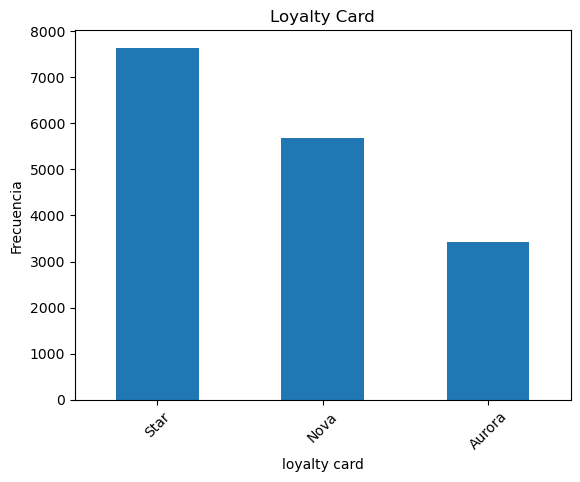


GENDER:
gender
Female    8410
Male      8327
Name: count, dtype: int64
Top: 8410 (50.2%)


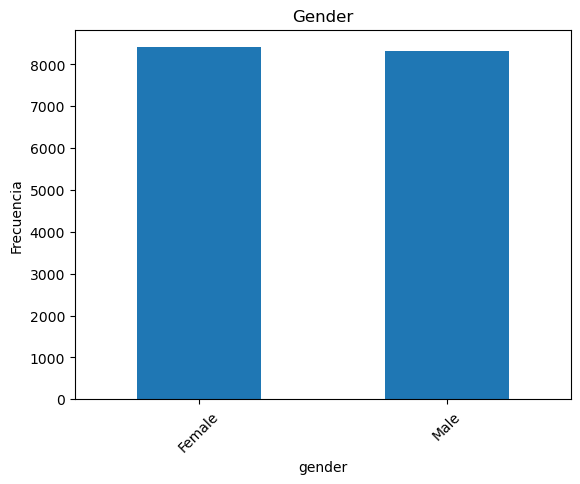


YEAR:
year
2017    202812
2018    202812
Name: count, dtype: int64


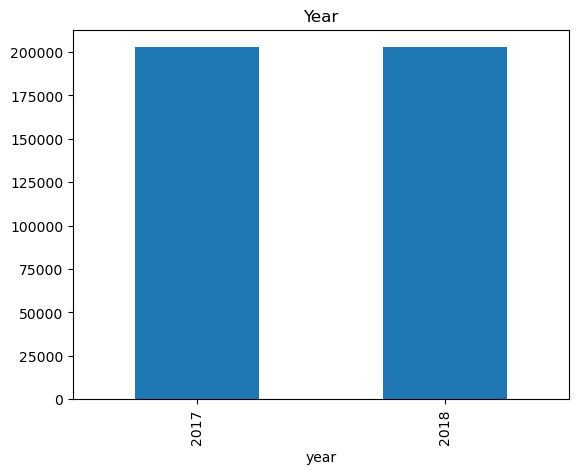


MONTH:
month
1     33802
2     33802
3     33802
4     33802
5     33802
6     33802
7     33802
8     33802
9     33802
10    33802
11    33802
12    33802
Name: count, dtype: int64


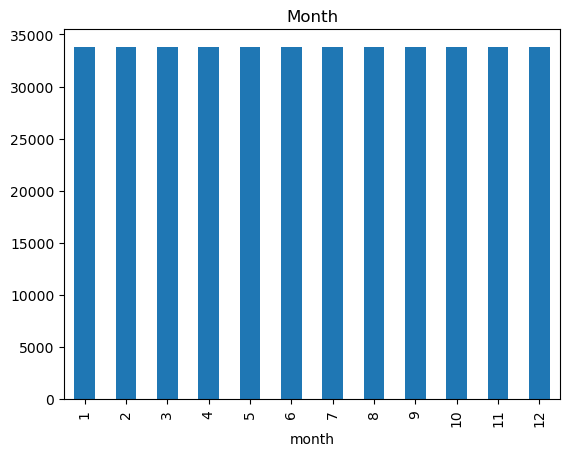


RESUMEN:
         Variable   Top_Cat      Freq      %
0        province   Ontario    5404.0  32.3%
1       education  Bachelor   10475.0  62.6%
2  marital status   Married    9735.0  58.2%
3    loyalty card      Star    7637.0  45.6%
4          gender    Female    8410.0  50.2%
5            year      2017  202812.0  50.0%
6           month         1   33802.0   8.3%


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets limpios (ajusta nombres)
df_flights = pd.read_csv('customer_flight_activity_clean.csv')  # Tu versión limpia
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')  # Tu versión limpia

# === 1. FRECUENCIAS LOYALTY ===
cat_loyalty = ['province', 'education', 'marital status', 'loyalty card', 'gender']
print("LOYALTY CATEGÓRICAS:")
for var in cat_loyalty:
    print(f"\n{var.upper()}:")
    freq = df_loyalty[var].value_counts()
    print(freq)
    print(f"Top: {freq.iloc[0]} ({freq.iloc[0]/len(df_loyalty)*100:.1f}%)")
    # Gráfico
    freq.head(10).plot(kind='bar', title=var.title())
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# === 2. FRECUENCIAS FLIGHTS ===
cat_flights = ['year', 'month']  # Si están separadas
for var in cat_flights:
    if var in df_flights.columns:
        print(f"\n{var.upper()}:")
        freq = df_flights[var].value_counts().sort_index()
        print(freq)
        freq.plot(kind='bar', title=var.title())
        plt.show()

# === 3. TABLA RESUMEN ===
summary = pd.DataFrame({
    'Variable': [],
    'Top_Cat': [],
    'Freq': [],
    '%': []
})
for df_name, cats in [('Loyalty', cat_loyalty), ('Flights', cat_flights)]:
    for var in cats:
        if df_name == 'Loyalty' and var in df_loyalty.columns:
            top = df_loyalty[var].value_counts().iloc[0]
            pct = top / len(df_loyalty) * 100
        elif df_name == 'Flights' and var in df_flights.columns:
            top = df_flights[var].value_counts().iloc[0]
            pct = top / len(df_flights) * 100
        else:
            continue
        summary = pd.concat([summary, pd.DataFrame({
            'Variable': [var],
            'Top_Cat': [df_loyalty[var].value_counts().index[0] if df_name=='Loyalty' else df_flights[var].value_counts().index[0]],
            'Freq': [top],
            '%': [f'{pct:.1f}%']
        })], ignore_index=True)

print("\nRESUMEN:")
print(summary)
summary.to_csv('frecuencias_categoricas.csv', index=False)


### Fase 3: Visualización 

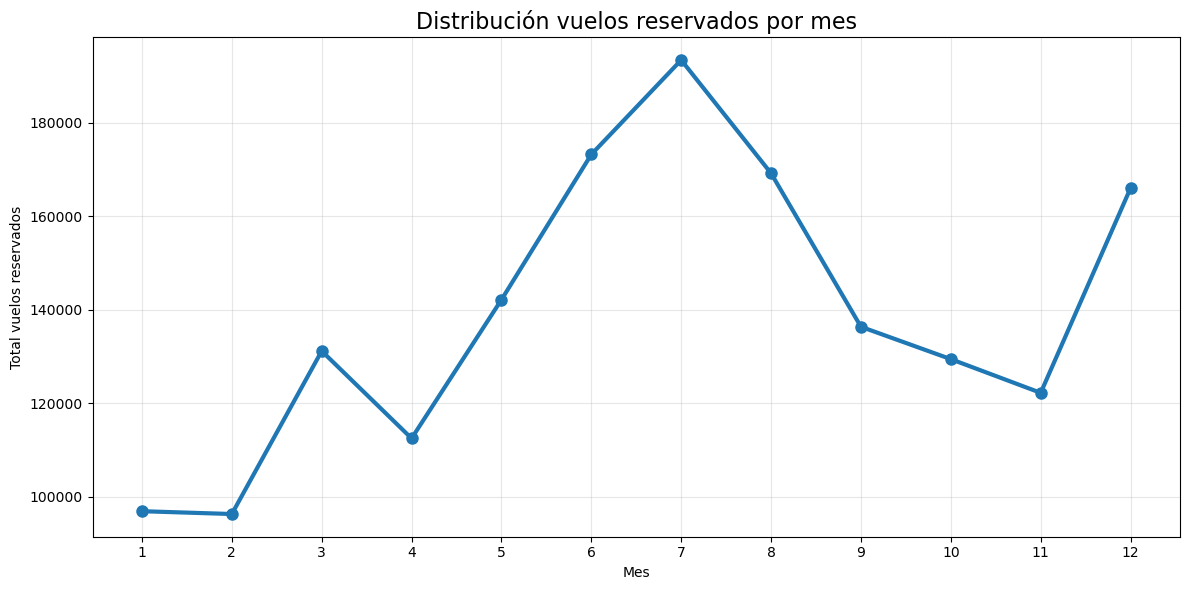

In [82]:
#Pregunta 1: VUELOS RESERVADOS POR MES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_flights = pd.read_csv('customer_flight_activity_clean.csv') 

plt.figure(figsize=(12,6))
vuelos_mes = df_flights.groupby('month')['flights booked'].sum()
plt.plot(vuelos_mes.index, vuelos_mes.values, marker='o', linewidth=3, markersize=8)
plt.title('Distribución vuelos reservados por mes', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Total vuelos reservados')
plt.xticks(range(1,13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pregunta1_vuelos_mes.png', dpi=300)
plt.show()


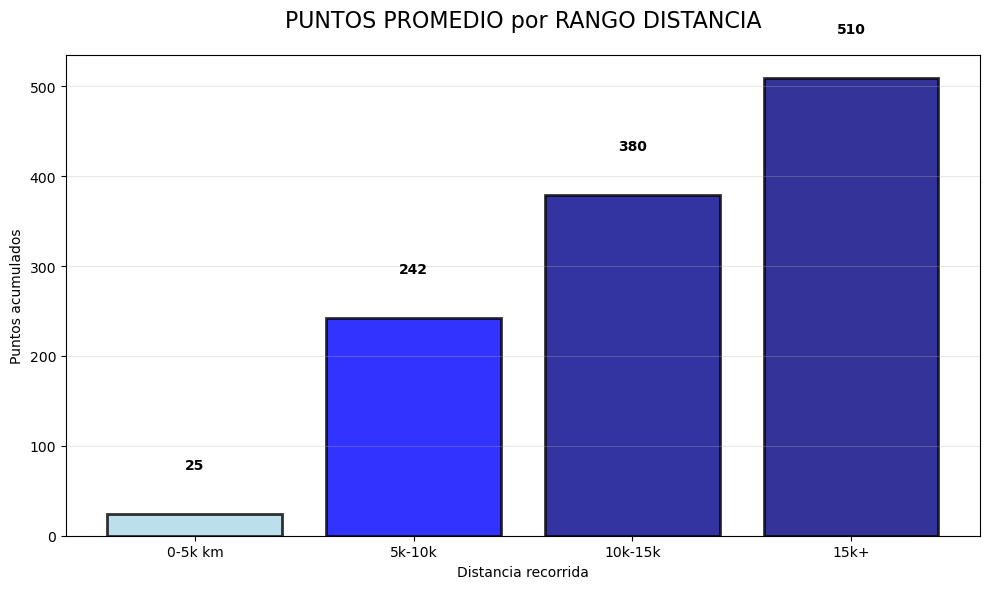

In [92]:
# Pregunta 2: DISTANCIA vs PUNTOS (PUNTOS + LÍNEA)
df_flights = pd.read_csv('customer_flight_activity_clean.csv')

# 4 bins simples
df_flights['dist_bin'] = pd.cut(df_flights['distance'], bins=4, labels=['0-5k km', '5k-10k', '10k-15k', '15k+'])
puntos_bin = df_flights.groupby('dist_bin')['points accumulated'].mean()

plt.figure(figsize=(10,6))
plt.bar(puntos_bin.index, puntos_bin.values, color=['lightblue', 'blue', 'darkblue', 'navy'], 
        alpha=0.8, edgecolor='black', linewidth=2)
plt.title('PUNTOS PROMEDIO por RANGO DISTANCIA', fontsize=16, pad=20)
plt.ylabel('Puntos acumulados')
plt.xlabel('Distancia recorrida')
for i, v in enumerate(puntos_bin.values):
    plt.text(i, v+50, f'{v:.0f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('pregunta2_simple.png', dpi=300)
plt.show()


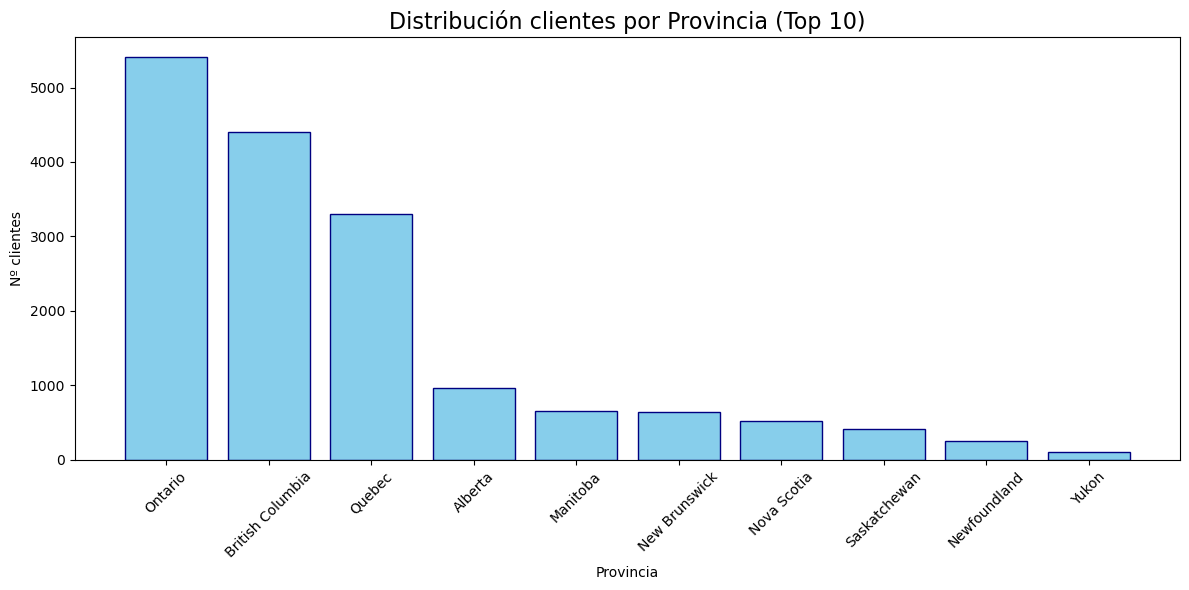

In [84]:
# Pregunta 3: DISTRIBUCIÓN CLIENTES POR PROVINCIA
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')
plt.figure(figsize=(12,6))
prov_freq = df_loyalty['province'].value_counts().head(10)
plt.bar(prov_freq.index, prov_freq.values, color='skyblue', edgecolor='navy')
plt.title('Distribución clientes por Provincia (Top 10)', fontsize=16)
plt.xlabel('Provincia')
plt.ylabel('Nº clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pregunta3_provincia.png', dpi=300)
plt.show()


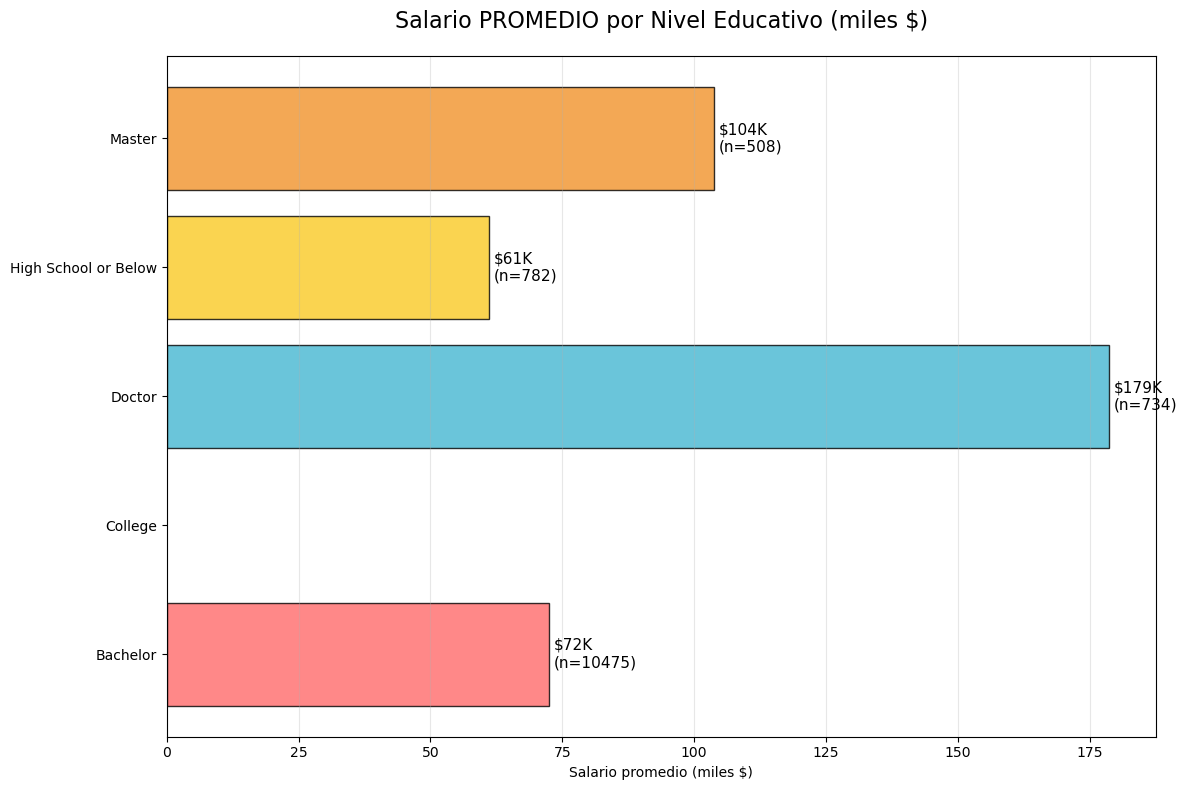

Doctor ~$190K, Bachelor ~$90K. Gap educativo claro.


In [ ]:
# Pregunta 4: SALARIO PROMEDIO por EDUCACIÓN
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')

# Calcular medias + barras horizontales con confianza
edu_salario = df_loyalty.groupby('education')['salary'].agg(['mean', 'count']).reset_index()
edu_salario['mean'] = edu_salario['mean']/1000  # Miles para legibilidad

plt.figure(figsize=(12,8))
bars = plt.barh(edu_salario['education'], edu_salario['mean'], 
                color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24', '#f0932b'],
                alpha=0.8, edgecolor='black')

# Etiquetas en barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'${width:.0f}K\n(n={edu_salario["count"][i]})',
             va='center', fontsize=11)

plt.title('Salario PROMEDIO por Nivel Educativo (miles $)', fontsize=16, pad=20)
plt.xlabel('Salario promedio (miles $)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('pregunta4_salario_visual.png', dpi=300)
plt.show()


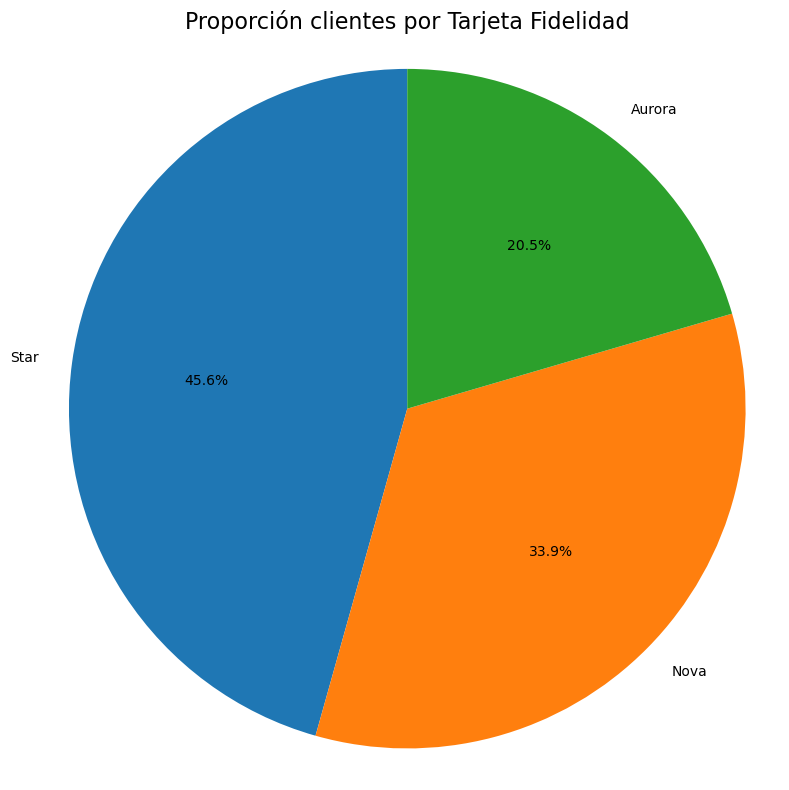

In [86]:
# Pregunta 5: PROPORCIÓN TARJETAS FIDELIDAD
plt.figure(figsize=(8,8))
tarjeta_prop = df_loyalty['loyalty card'].value_counts()
plt.pie(tarjeta_prop.values, labels=tarjeta_prop.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción clientes por Tarjeta Fidelidad', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pregunta5_tarjetas.png', dpi=300)
plt.show()


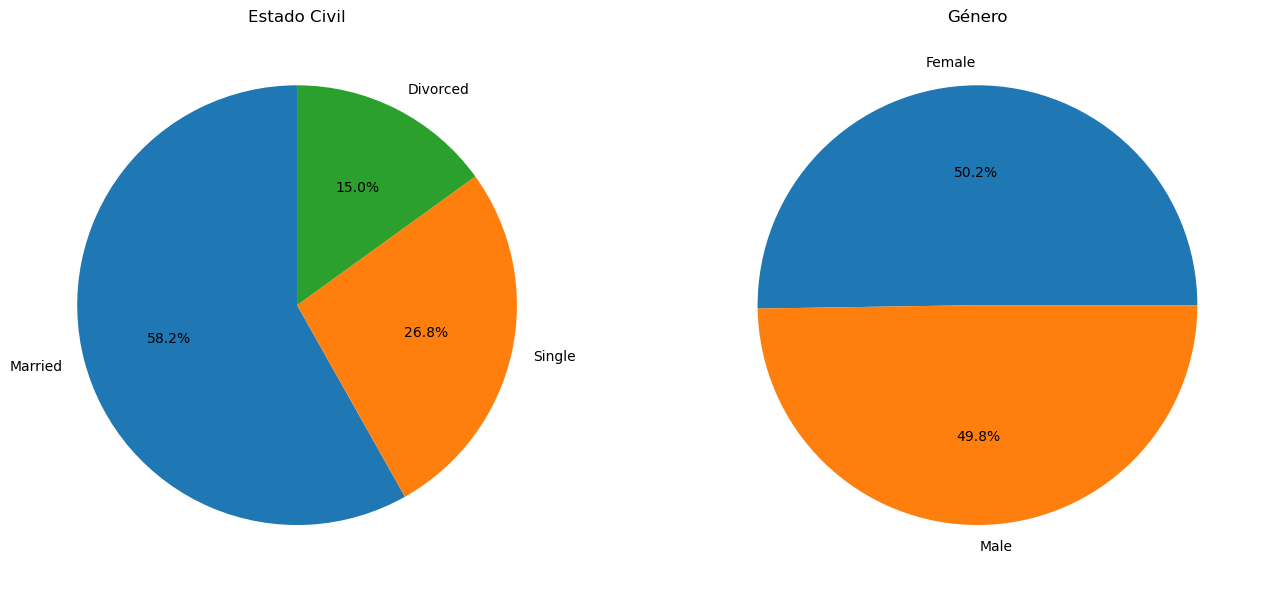

In [87]:
# Pregunta 6: DISTRIBUCIÓN ESTADO CIVIL + GÉNERO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Estado civil
estado = df_loyalty['marital status'].value_counts()
ax1.pie(estado.values, labels=estado.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Estado Civil')

# Género
genero = df_loyalty['gender'].value_counts()
ax2.pie(genero.values, labels=genero.index, autopct='%1.1f%%')
ax2.set_title('Género')

plt.tight_layout()
plt.savefig('pregunta6_civil_genero.png', dpi=300)
plt.show()
